### Jake and Amelia's Final Project: 
# Testing Our Original Dataset
  
## HEWS - Human Exercise and Warm-up dataSet

#### Let's see how we compare!

In [8]:
import pandas as pd
import librosa
import numpy as np
import IPython.display
import mirdata
import matplotlib.pyplot as plt
import mir_eval
import json

In [10]:
#Methods

In [21]:
import madmom
import pretty_midi
import librosa
import numpy as np

In [22]:
def load_midi(midi_path):
    """Load a midi file from the dataset.
    Loads entire length of MIDI file (Adapted from Homework #9)
    
    Parameters
    ----------
    midi_path: str
        Path to midi file from this datasett
    
    Returns
    -------
    intervals: np.ndarray shape=(n, 2)
        Array of note start and end times in seconds
    pitches: np.ndarray shape=(n)
        Array of note pitches in Hz

    """
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    piano_notes = midi_data.instruments[0].notes
    intervals = np.array([(note.start, note.end) for note in piano_notes]) # if note.end < 60.0
    pitches = librosa.midi_to_hz([note.pitch for note in piano_notes]) # if note.end < 60.0 (took it out to get whole file)
    return intervals, pitches

In [23]:
def sonify_annotation(intervals, pitches, sonification_fs=8000):
    """Sonify a note annotation. (from Homework #9)
    
    Parameters
    ----------
    intervals: np.ndarray shape=(n, 2)
        Array of note start and end times in seconds
    pitches: np.ndarray shape=(n,)
        Array of note pitches in Hz
    sonification_fs: float
        Sample rate of sonified audio.
        
    Returns
    -------
    y_sonify: np.ndarray shape=(m,)
        Stereo audio signal of sonified notes
    
    """
    pm = pretty_midi.PrettyMIDI()
    inst = pretty_midi.Instrument(program=0, is_drum=False, name='piano')
    pm.instruments.append(inst)
    velocity = 100
    for interval, pitch in zip(intervals, pitches):
        inst.notes.append(pretty_midi.Note(
            velocity, librosa.hz_to_midi(pitch), interval[0], interval[1]))
    return pm.synthesize(fs=sonification_fs)

In [24]:
def estimate_notes(audio_path, frames_per_second=100, note_length=0.2, thresh = 0.2):
    """Transcribe the given piano recording using madmom's piano transcription algorithm.
    Returns the notes in the format expected by mir_eval.
    
    Parameters
    ----------
    audio_path : str
        Path to input audio file
    frames_per_second : float, default=100
        Number of frames per second madmom should use internally to transcribe
    note_length : float
        The fixed length duration in seconds of all estimated notes

    Returns
    -------
    intervals: np.ndarray shape=(n, 2)
        Array of note start and end times in seconds
    pitches: np.ndarray shape=(n)
        Array of note pitches in Hz

    """
    proc = madmom.features.notes.NotePeakPickingProcessor(fps=frames_per_second, threshold=thresh)
    act = madmom.features.notes.RNNPianoNoteProcessor()(audio_path)
    notes = proc(act)
    
    pitches = []
    intervals = []
    
    for i in notes:
        intervals.append([i[0], i[0]+note_length])
        pitches.append(i[1])    

    pitches = librosa.midi_to_hz(np.array(pitches))
    intervals = np.array(intervals)
    
    return intervals, pitches
    
    pass

## Example time - let's see how it goes with one MIDI file.

In [46]:
#TESTING BOSENDORFER ELECTRIC PIANO

main_path = '/Volumes/Jakes Seagate/FINAL MIR PROJECT/DATASET/'

test_midi_path = main_path + 'HEWS_RandomChordClusters/HEWS_RandomChordClusters_47.mid' #dataset_directory['midi_filename'][0]
test_audio_path = main_path + 'HEWS_RandomChordClusters/HEWS_RandomChordClusters_47_BGP.wav' #dataset_directory['audio_filename'][0]

testInts, testPitches = load_midi(test_midi_path)

testY, testsr = librosa.load(test_audio_path)
estTestInts, estTestPitches = estimate_notes(test_audio_path)

test_transcription_score = mir_eval.transcription.precision_recall_f1_overlap(testInts, testPitches, estTestInts, estTestPitches, offset_ratio=None)

print(test_transcription_score)

(0.7058823529411765, 1.0, 0.8275862068965517, 0.15267246661941547)


In [47]:
IPython.display.Audio(sonify_annotation(estTestInts, estTestPitches,sonification_fs=testsr), rate = sr)

In [44]:
#TESTING CLASSIC ELECTRIC PIANO

main_path = '/Volumes/Jakes Seagate/FINAL MIR PROJECT/DATASET/'

test_midi_path = main_path + 'HEWS_RandomChordClusters/HEWS_RandomChordClusters_47.mid' #dataset_directory['midi_filename'][0]
test_audio_path = main_path + 'HEWS_RandomChordClusters/HEWS_RandomChordClusters_47_CEP.wav' #dataset_directory['audio_filename'][0]

testInts, testPitches = load_midi(test_midi_path)

testY, testsr = librosa.load(test_audio_path)
estTestInts, estTestPitches = estimate_notes(test_audio_path)

test_transcription_score = mir_eval.transcription.precision_recall_f1_overlap(testInts, testPitches, estTestInts, estTestPitches, offset_ratio=None)

print(test_transcription_score)

(0.4166666666666667, 0.8333333333333334, 0.5555555555555556, 0.15408336011989832)


In [39]:
#TESTING STEINWAY GRAND PIANO

main_path = '/Volumes/Jakes Seagate/FINAL MIR PROJECT/DATASET/'

test_midi_path = main_path + 'HEWS_RandomChordClusters/HEWS_RandomChordClusters_47.mid' #dataset_directory['midi_filename'][0]
test_audio_path = main_path + 'HEWS_RandomChordClusters/HEWS_RandomChordClusters_47_SGP.wav' #dataset_directory['audio_filename'][0]

testInts, testPitches = load_midi(test_midi_path)

testY, testsr = librosa.load(test_audio_path)
estTestInts, estTestPitches = estimate_notes(test_audio_path)

test_transcription_score = mir_eval.transcription.precision_recall_f1_overlap(testInts, testPitches, estTestInts, estTestPitches, offset_ratio=None)

print(test_transcription_score)

(0.6875, 0.9166666666666666, 0.7857142857142857, 0.15352928077721606)


In [42]:
#TESTING YAMAHA GRAND PIANO

main_path = '/Volumes/Jakes Seagate/FINAL MIR PROJECT/DATASET/'

test_midi_path = main_path + 'HEWS_RandomChordClusters/HEWS_RandomChordClusters_47.mid' #dataset_directory['midi_filename'][0]
test_audio_path = main_path + 'HEWS_RandomChordClusters/HEWS_RandomChordClusters_47_YGP.wav' #dataset_directory['audio_filename'][0]

testInts, testPitches = load_midi(test_midi_path)

testY, testsr = librosa.load(test_audio_path)
estTestInts, estTestPitches = estimate_notes(test_audio_path)

test_transcription_score = mir_eval.transcription.precision_recall_f1_overlap(testInts, testPitches, estTestInts, estTestPitches, offset_ratio=None)

print(test_transcription_score)

(0.9230769230769231, 1.0, 0.9600000000000001, 0.15241592348020408)


In [32]:
IPython.display.Audio(testY, rate=testsr)

## Multiple + eval now

In [103]:
#Route to Directory File

csv_filepath = '/Volumes/Jakes Seagate/FINAL MIR PROJECT/DATASET/HEWS/HEWS.csv'

dataset_directory = pd.read_csv(csv_filepath)    

print(dataset_directory.keys())
print(dataset_directory['midi_file_name'][100])
print(dataset_directory['bgp'][100])
print(dataset_directory['sgp'][100])
print(dataset_directory['key'][100])
print(dataset_directory['exercise'])


print(len(dataset_directory))

#print(dataset_directory)

Index(['midi_file_name', 'key', 'exercise', 'bgp', 'cep', 'sgp', 'ygp'], dtype='object')
HEWS_OctaveStrength_E.mid
HEWS_OctaveStrength_E_BGP.wav
HEWS_OctaveStrength_E_SGP.wav
E
0          arpeggios
1          arpeggios
2          arpeggios
3          arpeggios
4          arpeggios
5          arpeggios
6          arpeggios
7          arpeggios
8          arpeggios
9          arpeggios
10         arpeggios
11            chords
12            chords
13            chords
14              lows
15              lows
16              lows
17              lows
18              lows
19              lows
20              lows
21              lows
22              lows
23              lows
24              lows
25              lows
26              lows
27     melody_chords
28     melody_chords
29     melody_chords
           ...      
241    trills_chords
242    trills_chords
243    trills_chords
244    trills_chords
245    trills_chords
246    trills_chords
247    trills_chords
248    trills_chords
249 

In [26]:
import mir_eval
import pandas as pd
from tqdm import trange

In [119]:
# each instrument gets a dictionary for its scores
# from there, we can compare by indexes
# each dictionary holds --> t_s_inst[index] = [p, r, f_m, a_o]

main_dataset_path = '/Volumes/Jakes Seagate/FINAL MIR PROJECT/DATASET/HEWS/'

hews_midi_paths = main_dataset_path + dataset_directory['midi_file_name']
hews_ygp_paths = main_dataset_path + dataset_directory['ygp']
hews_bgp_paths = main_dataset_path + dataset_directory['bgp']
hews_sgp_paths = main_dataset_path + dataset_directory['sgp']
hews_cep_paths = main_dataset_path + dataset_directory['cep']

transcription_scores_bgp = {}
transcription_scores_cep = {}
transcription_scores_sgp = {}
transcription_scores_ygp = {}

estimations_bgp = {}
estimations_cep = {}
estimations_sgp = {}
estimations_ygp = {}

est_thresh = 0.25    # test this as a hyperparameter

In [129]:
for i in trange(len(hews_midi_paths)):
    
# for f in trange(1):
#     i = 146    # testing out a case where nothing was detected, assessing the if/else to the dictionaries worked

    ref_int, ref_pitch = load_midi(hews_midi_paths[i])

    #get the BGP data
    est_int, est_pitch = estimate_notes(hews_bgp_paths[i], thresh=est_thresh)
    estimations_bgp[i] = [est_int, est_pitch] #save the estimations, so that we can look at them later without processing again
    if len(est_int) < 1: transcription_scores_bgp[i] = [0,0,0,0] #no guesses means 0% everything
    else: transcription_scores_bgp[i] = mir_eval.transcription.precision_recall_f1_overlap(ref_int, ref_pitch, est_int, est_pitch, offset_ratio=None)
    
    #get the CEP data
    est_int, est_pitch = estimate_notes(hews_cep_paths[i], thresh=est_thresh)
    estimations_cep[i] = [est_int, est_pitch] #save the estimations, so that we can look at them later without processing again
    if len(est_int) < 1: transcription_scores_cep[i] = [0,0,0,0] #no guesses means 0% everything
    else: transcription_scores_cep[i] = mir_eval.transcription.precision_recall_f1_overlap(ref_int, ref_pitch, est_int, est_pitch, offset_ratio=None)
    
    #get the SGP data
    est_int, est_pitch = estimate_notes(hews_sgp_paths[i], thresh=est_thresh)
    estimations_sgp[i] = [est_int, est_pitch] #save the estimations, so that we can look at them later without processing again
    if len(est_int) < 1: transcription_scores_sgp[i] = [0,0,0,0] #no guesses means 0% everything
    else: transcription_scores_sgp[i] = mir_eval.transcription.precision_recall_f1_overlap(ref_int, ref_pitch, est_int, est_pitch, offset_ratio=None)
    
    #get the YGP data
    est_int, est_pitch = estimate_notes(hews_ygp_paths[i], thresh=est_thresh)
    estimations_ygp[i] = [est_int, est_pitch] #save the estimations, so that we can look at them later without processing again
    if len(est_int) < 1: transcription_scores_ygp[i] = [0,0,0,0] #no guesses means 0% everything
    else: transcription_scores_ygp[i] = mir_eval.transcription.precision_recall_f1_overlap(ref_int, ref_pitch, est_int, est_pitch, offset_ratio=None)

    #print(i)






  0%|          | 0/271 [00:00<?, ?it/s]




  0%|          | 1/271 [00:02<10:01,  2.23s/it]




  1%|          | 2/271 [00:04<09:36,  2.14s/it]




  1%|          | 3/271 [00:05<08:53,  1.99s/it]




  1%|▏         | 4/271 [00:07<08:41,  1.95s/it]




  2%|▏         | 5/271 [00:09<08:26,  1.90s/it]




  2%|▏         | 6/271 [00:11<08:15,  1.87s/it]




  3%|▎         | 7/271 [00:13<08:23,  1.91s/it]




  3%|▎         | 8/271 [00:14<08:05,  1.85s/it]




  3%|▎         | 9/271 [00:16<08:00,  1.83s/it]




  4%|▎         | 10/271 [00:18<08:17,  1.91s/it]




  4%|▍         | 11/271 [00:20<08:06,  1.87s/it]




  4%|▍         | 12/271 [00:23<10:01,  2.32s/it]




  5%|▍         | 13/271 [00:27<11:53,  2.76s/it]




  5%|▌         | 14/271 [00:38<21:48,  5.09s/it]




  6%|▌         | 15/271 [00:39<16:48,  3.94s/it]




  6%|▌         | 16/271 [00:40<13:14,  3.11s/it]




  6%|▋         | 17/271 [00:41<10:46,  2.55s/it]




  7%|▋         | 18/271 [00:43<09:14,  2.19s/it]




  7%|▋

 44%|████▍     | 120/271 [03:58<06:29,  2.58s/it]




 45%|████▍     | 121/271 [04:00<06:05,  2.43s/it]




 45%|████▌     | 122/271 [04:02<05:42,  2.30s/it]




 45%|████▌     | 123/271 [04:04<05:14,  2.12s/it]




 46%|████▌     | 124/271 [04:06<04:50,  1.97s/it]




 46%|████▌     | 125/271 [04:07<04:26,  1.83s/it]




 46%|████▋     | 126/271 [04:09<04:16,  1.77s/it]




 47%|████▋     | 127/271 [04:11<04:10,  1.74s/it]




 47%|████▋     | 128/271 [04:12<04:13,  1.77s/it]




 48%|████▊     | 129/271 [04:14<04:09,  1.76s/it]




 48%|████▊     | 130/271 [04:16<04:18,  1.83s/it]




 48%|████▊     | 131/271 [04:18<04:11,  1.80s/it]




 49%|████▊     | 132/271 [04:20<04:06,  1.77s/it]




 49%|████▉     | 133/271 [04:21<04:05,  1.78s/it]




 49%|████▉     | 134/271 [04:23<04:08,  1.81s/it]




 50%|████▉     | 135/271 [04:25<04:17,  1.89s/it]




 50%|█████     | 136/271 [04:27<04:24,  1.96s/it]




 51%|█████     | 137/271 [04:29<04:21,  1.95s/it]




 51%|█████     | 138/271 [04

 88%|████████▊ | 238/271 [08:12<01:20,  2.44s/it]




 88%|████████▊ | 239/271 [08:14<01:13,  2.30s/it]




 89%|████████▊ | 240/271 [08:16<01:06,  2.14s/it]




 89%|████████▉ | 241/271 [08:18<01:01,  2.05s/it]




 89%|████████▉ | 242/271 [08:19<00:54,  1.88s/it]




 90%|████████▉ | 243/271 [08:22<00:54,  1.95s/it]




 90%|█████████ | 244/271 [08:24<00:53,  1.99s/it]




 90%|█████████ | 245/271 [08:26<00:51,  1.96s/it]




 91%|█████████ | 246/271 [08:28<00:49,  1.99s/it]




 91%|█████████ | 247/271 [08:29<00:45,  1.91s/it]




 92%|█████████▏| 248/271 [08:32<00:47,  2.06s/it]




 92%|█████████▏| 249/271 [08:36<00:59,  2.69s/it]




 92%|█████████▏| 250/271 [08:39<01:01,  2.93s/it]




 93%|█████████▎| 251/271 [08:43<01:02,  3.15s/it]




 93%|█████████▎| 252/271 [08:46<00:58,  3.10s/it]




 93%|█████████▎| 253/271 [08:49<00:55,  3.07s/it]




 94%|█████████▎| 254/271 [08:52<00:52,  3.06s/it]




 94%|█████████▍| 255/271 [08:55<00:49,  3.10s/it]




 94%|█████████▍| 256/271 [08

In [130]:
# lets get this data
transcription_scores_cep[140]

# so far: something's up with the LOWS set, but the octaveStrength set is strong.

(0.6111111111111112, 0.6875, 0.6470588235294118, 0.14665531027595433)

In [133]:
def getInstrumentScores(scoreDict, title='Transcription Performance Metrics', plot=True):
    #get individual instrument stats

    p = []
    r = []
    f_m = []
    avg_o = []

    for i, vals in scoreDict.items():
        p.append(vals[0])
        r.append(vals[1])
        f_m.append(vals[2])
        avg_o.append(vals[3])

    flat_scores_all = [p, r, f_m, avg_o]

    if plot:
        fig1, ax1 = plt.subplots()
        ax1.set_title(title)
        ax1.boxplot(flat_scores_all, labels = ['Precision', 'Recall', 'F-measure', 'Avg Overlap'])
     
    return flat_scores_all

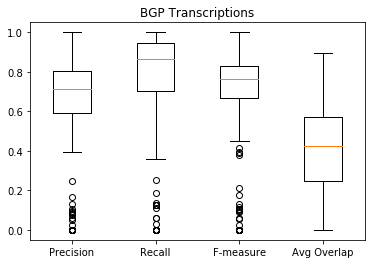

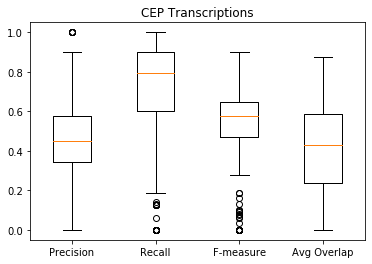

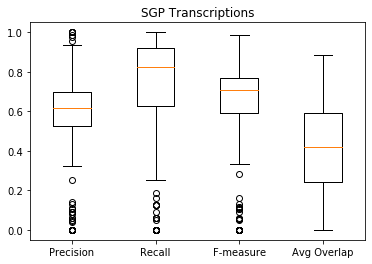

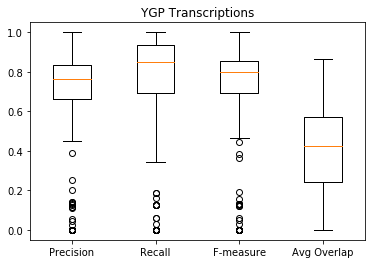

In [134]:
bgp_stats = getInstrumentScores(transcription_scores_bgp, title = 'BGP Transcriptions')
cep_stats = getInstrumentScores(transcription_scores_cep, title = 'CEP Transcriptions')
sgp_stats = getInstrumentScores(transcription_scores_sgp, title = 'SGP Transcriptions')
ygp_stats = getInstrumentScores(transcription_scores_ygp, title = 'YGP Transcriptions')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1e99c390>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1e9b67f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1e99cbe0>,
 'medians': [<matplotlib.lines.Line2D at 0x1c1e9b6e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c1e9b6f60>,
 'means': []}

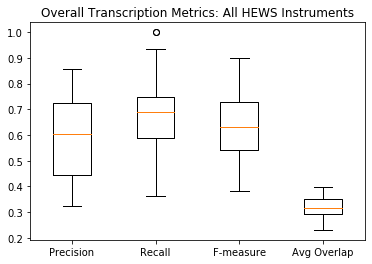

In [153]:
#overall dataset stats

p_ov = []
r_ov = []
f_m_ov = []
avg_o_ov = []

allTheFlats = [bgp_stats, cep_stats, sgp_stats, ygp_stats]

for flatData in allTheFlats:
    p_ov.append(flatData[0])
    r_ov.append(flatData[1])
    f_m_ov.append(flatData[2])
    avg_o_ov.append(vals[3])

flat_scores_ov = [p_ov, r_ov, f_m_ov, avg_o_ov]

fig1, ax1 = plt.subplots()
ax1.set_title('Overall Transcription Metrics: All HEWS Instruments')
ax1.boxplot(flat_scores_all, labels = ['Precision', 'Recall', 'F-measure', 'Avg Overlap'])

### Making lists of indexes for individual exercise types

In [125]:
arp_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='arpeggios']
chord_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='chords']
lows_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='lows']
melody_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='melody_chords']
octNoodle_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='octave_noodles']
octStr_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='octave_strength']
overtoneStr_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='overtone_strength']
randChordClust_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='random_chord_clusters']
randNote_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='random_note']
scales_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='scales']
songs_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='songs']
splits_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='splits']
trillsChords_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='trills_chords']
trillsOnly_inds = [i for i in range(len(hews_midi_paths)) if dataset_directory['exercise'][i]=='trills_only']    

In [144]:

#arp_inds
[bgp_stats[0][i] for i in arp_inds]

[0.8082191780821918,
 0.7428571428571429,
 0.6811594202898551,
 0.7341772151898734,
 0.803921568627451,
 0.918918918918919,
 0.5921052631578947,
 0.6851851851851852,
 0.7708333333333334,
 0.6164383561643836,
 0.6274509803921569]

In [172]:
def getExerciseStats(inds):
    p_ov = []
    r_ov = []
    f_m_ov = []
    avg_o_ov = []

    allTheFlats = [bgp_stats, cep_stats, sgp_stats, ygp_stats]

    for flatData in allTheFlats:
        for i in inds: 
            p_ov.append(flatData[0][i])
            r_ov.append(flatData[1][i] )
            f_m_ov.append(flatData[2][i])
            avg_o_ov.append(flatData[3][i])

    flat_scores_ov = [p_ov, r_ov, f_m_ov, avg_o_ov]
    
    return flat_scores_ov

In [177]:
def plotSingleExercise(inds, title):
    fig1, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.boxplot(getExerciseStats(inds), labels = ['Precision', 'Recall', 'F-measure', 'Avg Overlap'])

['arpeggios', 'chords', 'lows', 'melody_chords', 'octave_noodles', 'octave_strength', 'overtone_strength', 'random_chord_clusters', 'random_note', 'scales', 'songs', 'splits', 'trills_chords', 'trills_only']


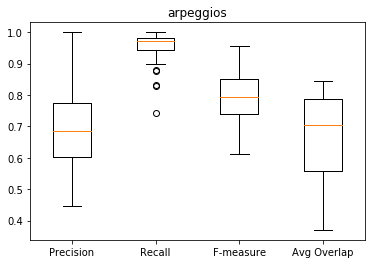

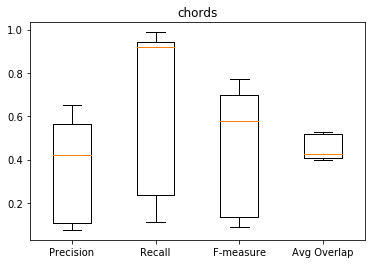

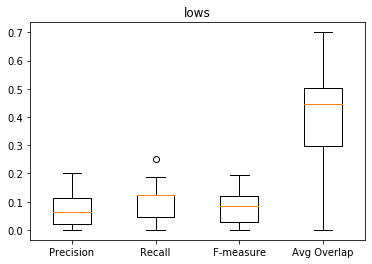

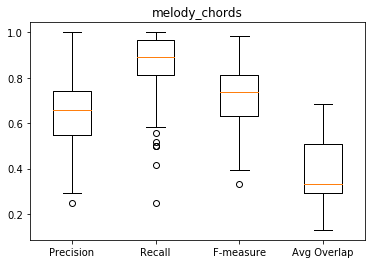

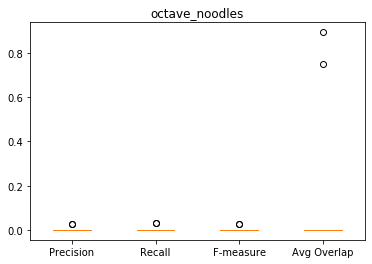

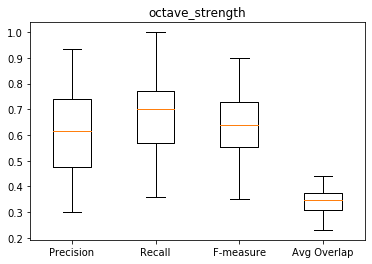

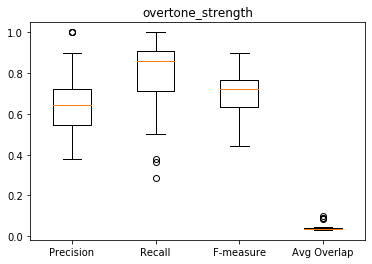

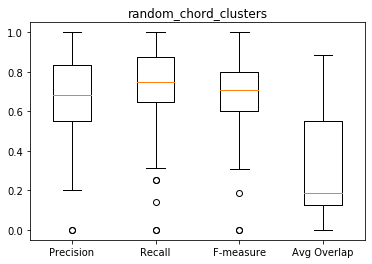

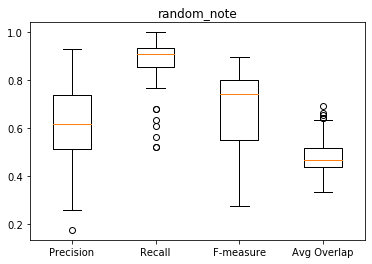

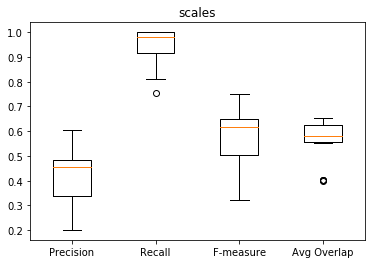

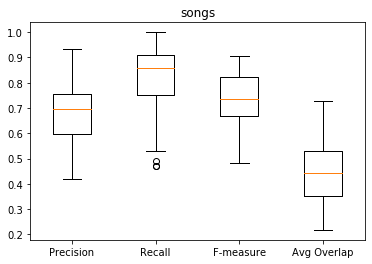

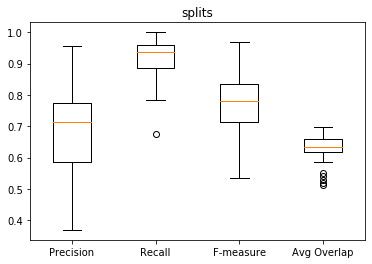

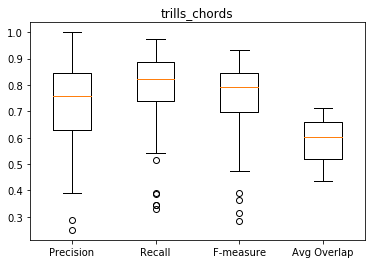

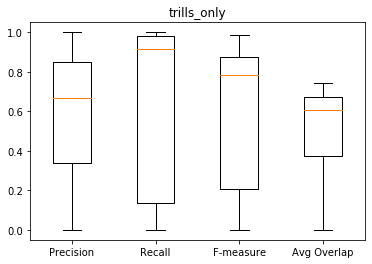

In [180]:
#getExerciseStats(arp_inds)
exerciseInds = [arp_inds, chord_inds, lows_inds, melody_inds, octNoodle_inds, octStr_inds, overtoneStr_inds, randChordClust_inds, randNote_inds, scales_inds, songs_inds, splits_inds, trillsChords_inds, trillsOnly_inds]
exerciseTypes = list(dict.fromkeys(dataset_directory['exercise']))

print(exerciseTypes)

for i in range(len(exerciseInds)):
    plotSingleExercise(exerciseInds[i], exerciseTypes[i])

In [161]:
# lets see how one at a time did
print(transcription_scores_bgp[33]) #hope it's not empty after running for real
print(transcription_scores_cep[33])
print(transcription_scores_sgp[33])
print(transcription_scores_ygp[33])

ii, pp = estimations_sgp[33]
IPython.display.Audio(sonify_annotation(ii, pp, 22050), rate=22050)

(0.5714285714285714, 0.8888888888888888, 0.6956521739130435, 0.31541882249457964)
(0.45, 1.0, 0.6206896551724138, 0.28710777053718817)
(0.48484848484848486, 0.8888888888888888, 0.6274509803921569, 0.31233104243261745)
(0.7083333333333334, 0.9444444444444444, 0.8095238095238096, 0.3034497508243742)


In [92]:
trueii, truepp = load_midi(hews_midi_paths[33])
IPython.display.Audio(sonify_annotation(ii, pp, 22050), rate=22050)

In [93]:
yt, fst = librosa.load(hews_sgp_paths[33])
IPython.display.Audio(yt, rate=fst)

In [186]:
from mir_eval import display

In [191]:
def sonify_notes(audio_path, intervals, pitches):
    """Sonify a note annotation along side its corresponding audio file.
    The original piano audio should be in one channel and the sonified notes in the other.
    
    Parameters
    ----------
    audio_path: str
        Path to audio file
    intervals: np.ndarray shape=(n, 2)
        Array of note start and end times in seconds
    pitches: np.ndarray shape=(n,)
        Array of note pitches in Hz

    Returns
    -------
    y_sonify: np.ndarray shape=(2, m)
        Mono audio signal of sonified notes
    fs_sonify: float
        Sample rate of sonified audio

    """
    # hint: if one channel is consistently louder than the other, turn it down :)
    
    y_orig, fs_sonify = librosa.load(audio_path)
    
    y_midi = sonify_annotation(intervals, pitches, sonification_fs=fs_sonify)
    
    #make sure the lengths are the same
    if len(y_orig) > len(y_midi): 
        y_midi = np.append(y_midi, [0]*(len(y_orig)-len(y_midi)))
    if len(y_midi) > len(y_orig): 
        y_orig = np.append(y_orig, [0]*(len(y_midi)-len(y_orig)))
    
    #normalize
    y_orig = y_orig/np.max(y_orig)
    y_sonify = np.vstack((y_orig, y_midi))
    return y_sonify, fs_sonify

In [212]:
def getStats(index, infoString = "Cool Stats", plot = True):
    #statTrack = tracks[index]
    
    print(infoString)
    #print("Scores: \nPrecision - ", p[index], "\nRecall - ", r[index], "\nF-Measure - ", f_m[index], "\nAverage Offset Ratio Score - ", avg_o[index])
    
    statMidiPath = hews_midi_paths[index]
    statInts, statPitch = load_midi(statMidiPath)
    
    statPredIntsBGP, statPredPitchBGP = estimations_bgp[index]
    statPredIntsCEP, statPredPitchCEP = estimations_cep[index]
    statPredIntsSGP, statPredPitchSGP = estimations_sgp[index]
    statPredIntsYGP, statPredPitchYGP = estimations_ygp[index]
    
    if plot:
        fig = plt.figure(figsize=(20, 10))
        
        ax1 = fig.add_subplot(511)
        ax2 = fig.add_subplot(512)
        ax3 = fig.add_subplot(513)
        ax4 = fig.add_subplot(514)
        ax5 = fig.add_subplot(515)
        
        ax1.title.set_text('Ground Truths')
        ax2.title.set_text('Estimations: BGP')
        ax3.title.set_text('Estimations: CEP')
        ax4.title.set_text('Estimations: SGP')
        ax5.title.set_text('Estimations: YGP')
        
        
        mir_eval.display.piano_roll(statInts, statPitch, ax = ax1)
        mir_eval.display.piano_roll(statPredIntsBGP, statPredPitchBGP, ax = ax2)
        mir_eval.display.piano_roll(statPredIntsCEP, statPredPitchCEP, ax = ax3)
        mir_eval.display.piano_roll(statPredIntsSGP, statPredPitchSGP, ax = ax4)
        mir_eval.display.piano_roll(statPredIntsYGP, statPredPitchYGP, ax = ax5)
    
    yBGP, fsBGP = sonify_notes(main_dataset_path + dataset_directory['bgp'][index], statPredIntsBGP, statPredPitchBGP)
    yCEP, fsCEP = sonify_notes(main_dataset_path + dataset_directory['cep'][index], statPredIntsCEP, statPredPitchCEP)
    ySGP, fsSGP = sonify_notes(main_dataset_path + dataset_directory['sgp'][index], statPredIntsSGP, statPredPitchSGP)
    yYGP, fsYGP = sonify_notes(main_dataset_path + dataset_directory['ygp'][index], statPredIntsYGP, statPredPitchYGP)
    
    return yBGP, yCEP, ySGP, yYGP, fsBGP




Songs 12


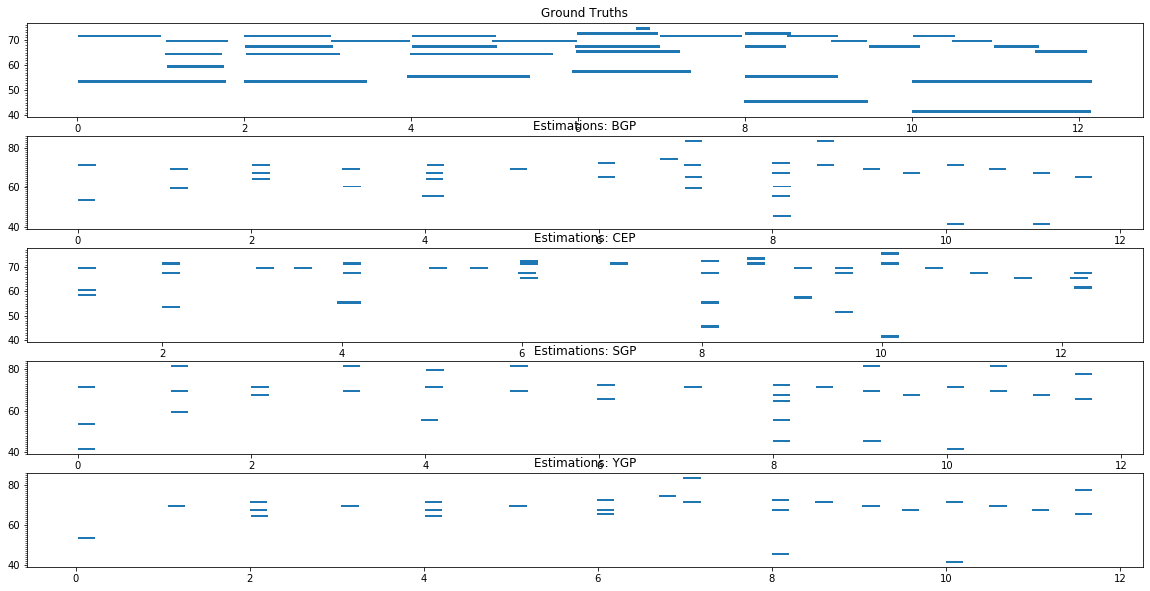

In [207]:
# track 1: best f-measure
yBGPs12, yCEPs12, ySGPs12, yYGPs12, fss12 = getStats(208, "Songs 12")


In [208]:
IPython.display.Audio(yBGPs12, rate=fss12)

In [209]:
IPython.display.Audio(yCEPs12, rate=fss12)

In [210]:
IPython.display.Audio(ySGPs12, rate=fss12)

In [211]:
IPython.display.Audio(yYGPs12, rate=fss12)